## Predicting heart disease using machine learning

#### Based on medical attributes, python-based machine learning and data science libraries we'll predict if someone has heartdisease.

#### Following the approach of: Problem definition, data, evaluation, features, modelling and expersimentation.

### 1. Problem definition

##### Can we predict whether or not a patient has heart disease based on clinical attributes?

### 2. Data

##### The data comes from UCI Machine Learning Repository, called Heart Disease Data Set. In this section we'll look at the data.

In [ ]:
#Data dictionary

#1. age: The age of the patient.
#2. sex: The gender of the patient. (1 = male, 0 = female).
#3. cp: Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).
#4. trestbps: Resting blood pressure in mmHg.
#5. chol: Serum Cholestero in mg/dl.
#6. fbs: Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).
#7. restecg: Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).
#8. thalach: Max heart rate achieved.
#9. exang: Exercise induced angina (1 = yes, 0 = no).
#10. oldpeak: ST depression induced by exercise relative to rest.
#11. slope: Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
#12. ca: Number of major vessels (0–3) colored by flourosopy.
#13. thal.: Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).
#14. num: Diagnosis of heart disease (0 = absence, 1, 2, 3, 4 = present).

#### Importing the tools

In [1]:
#Regular EDA (exploratory data analysis) tools and plotting libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


#### Getting the data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape #in the order of rows, columns

(303, 14)

#### Data exploration (exploratory data analysis or EDA)

In [ ]:
#Answering the following questions:
#1. What are we trying to solve?        Predicting if patient has heart disease.
#2. What kind of data?                  All numerical.
#3. How do we treat different types?    .
#4. What is missing?                    None missing.
#5. How to deal with missing data?      Not necessary.
#6. Where are the outliers?             .
#7. How to treat outliers?              .
#8. Is manipulating features necessary? .

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df["target"].value_counts()

#Shows well balanced targets.

1    165
0    138
Name: target, dtype: int64

In [13]:
df.info()

#Shows numerical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
df.isna().sum()

#Shows no missing values.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df.describe()

#Next: Comparing different columns to look at patterns

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1    207
0     96
Name: sex, dtype: int64


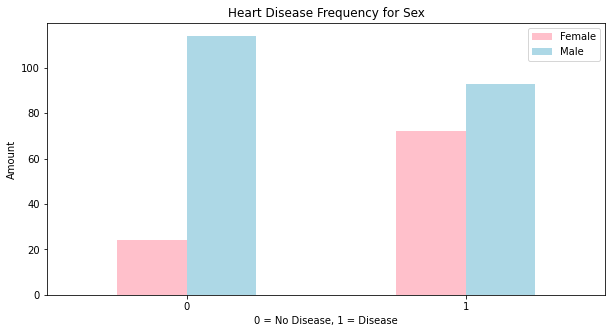

In [35]:
#Heart disease frequency according to Sex.

print(df.sex.value_counts())

#Shows more males than females.

#Compare target column wit sex column.
pd.crosstab(df.target, df.sex)

#Based on this data set, females are more likely to have heart disease.

#Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 5), color=["pink", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);



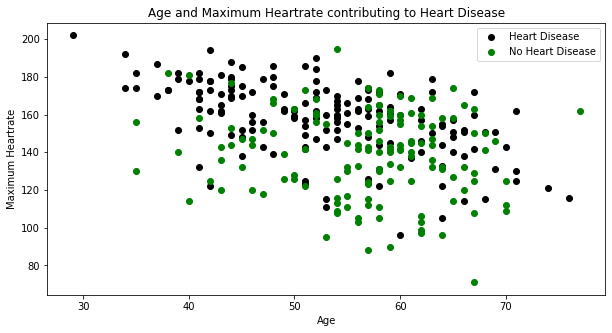

In [43]:
#Comparing Age, Maximum Heartrate (thalach) and target
plt.figure(figsize=(10, 5))

#Scatter with positive examples (heart disease=positive)
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="black")

#Scatter with negative examples (heart disease=negative)
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="green")

plt.title("Age and Maximum Heartrate contributing to Heart Disease")
plt.xlabel("Age")
plt.ylabel("Maximum Heartrate")
plt.legend(["Heart Disease","No Heart Disease"]);

#No pattern recognized

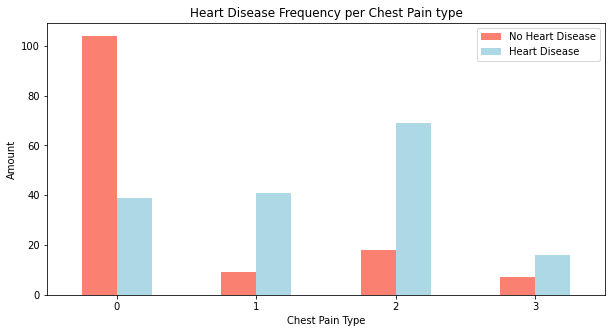

In [44]:
#Comparing Chest Pain (cp) to target

pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 5), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency per Chest Pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xticks(rotation=0);

#Non-anginal pain is more frequent for patients with heart disease.
#Typical chest pain is more frequent for patients without heart disease.

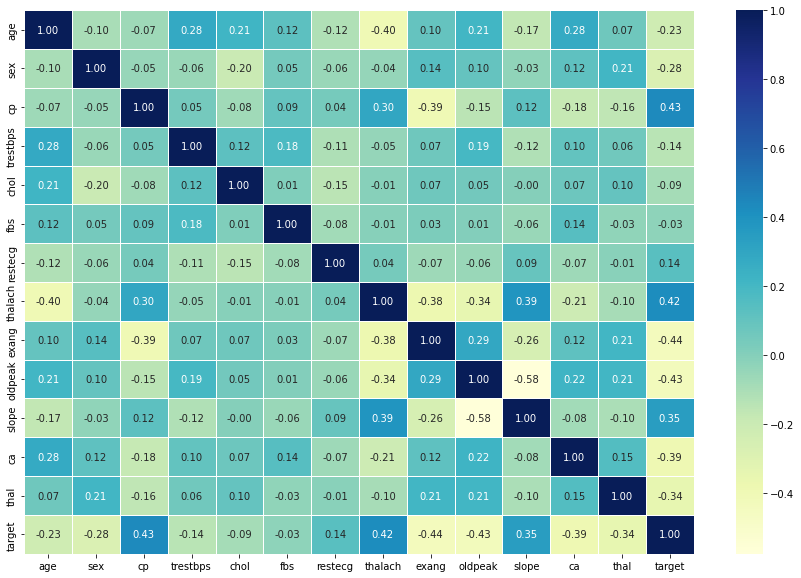

In [48]:
#Make a correlelation matrix
corr_matrix = df.corr()
dig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

### 3. Modelling

In [4]:
#Splitting data into X and y
#This splitting will create a training set and a test set.
X= df.drop("target", axis=1)
y= df["target"]

np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
#Three different machine learning models will be used; Logistic Regression, K-Nearest Neighbours Classifier and RandomForestClassifier.
#These three models are choosen based on the dataset and will best suit our goal of classification.

#Putting models in dictionary
models = {"Logisctic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "RandomForest": RandomForestClassifier()}

#Creating function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and evaluate given machine learning models.
    Models: a dict of different Scikit-Learn machine learning models.
    """
    np.random.seed(9)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
    

In [7]:
#Fitting and scoring models
model_scores = fit_and_score(
    models=models, 
    X_train= X_train, 
    X_test= X_test, 
    y_train= y_train,
    y_test=y_test)

C:\Users\noort\.conda\envs\kitsu-katsu\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


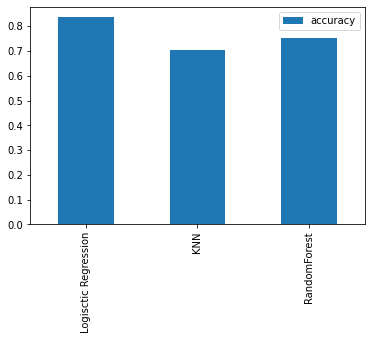

In [8]:
#Comparing the models
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

#This shows that the Logistic Regression model is the most accurate 

### 4. Model tuning

#The evaluate the model, we'll look at the following;
#Hyperparameter tuning, 
#feature importance,
#confusion matrix,
#cross-validation, 
#precision,
#recall,
#F1 score,
#classification report,
#ROC curve,
#and area under the curve.

Maximum KNN score on the test data: 75.41%


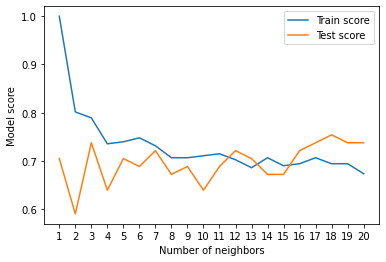

In [13]:
#Tuning KNN (by hand)
train_scores= []
test_scores= []

#Creating a list of different values for n_eighbors
neighbors = range(1,21)
#Setup KNN instance
knn = KNeighborsClassifier()
#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #Fit the algoritm
    knn.fit(X_train, y_train)
    #Update the training and testing scores list
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

#Visualize the results
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

#This didn't improve the model that much,
#Therefore, we'll remove the model from the list in further tuning.

In [14]:
#Tuning the Logistic Regression and RandomForestClassifier with RandomizedSearch.CV

#Creating hyperparameter grid for Logistic Regression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]}

#Creating hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_lead": np.arange(1, 20, 2)}

In [15]:
#Tuning LogisticRegression
np.random.seed(9)

#Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions= log_reg_grid,
    cv=5,
    n_iter=20,
    verbose=True)

#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [16]:
#The best hyperparameters are:
rs_log_reg.best_params_
#at video 15

{'solver': 'liblinear', 'C': 1.623776739188721}